# EcodataLab2 
# Validation for Method 2
Author: Jiaxin Kathy Li and Christopher Jones 

Summer 2020

In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# Related Dataset 1: Generated File from Weighted Average Method

This is the resulting data by method 2: weighted average. See more info in that file.

In [6]:
estimated_raw = pd.read_csv('monthly_avg_bycounty.csv').drop(columns={"Unnamed: 0"})
estimated_raw.head(2)

,County,Year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,COUNTY POP
0,37,2014,522.007731,459.778292,462.283381,434.873854,447.336366,516.528350,666.883002,601.006098,522.200286,586.978241,467.408362,491.046341,6643854
1,111,2014,446.504291,382.445376,384.937459,403.472268,484.361388,601.941383,745.864461,705.307330,596.337753,571.789576,486.992866,535.666222,822872



# Related Dataset 2: Actual Data from Energy COUNTIES files 

This is the actual data from reality. We would be trying to compare it with generated data before. 


In [24]:
reality_raw = pd.read_csv('COUNTIES_CountyEnergy.csv')
reality_raw.head(2)

,Geo_FIPS,Geo_NAME,County,Sector,YEAR,GWH,MTHERMS,POP,Households,Employees,...,ELEC.TCO2ePerEstablishment,GAS.TCO2ePerEstablishment,TOT.TCO2ePerEstablishment,ELEC.MBTU,GAS.MBTU,TOT.MBTU,MBTUPERHH,COUNTYSECTOR,TotalGHG,2030GHGTarget
0,6001,"Alameda County, California",ALAMEDA,Non-Residential,1990,7109.0,230.0,1274800,479518,505595.0,...,91.0,38,129,24257927,22990561,47248487,99,ALAMEDANon-Residential,NaN,NaN
1,6001,"Alameda County, California",ALAMEDA,Residential,1990,2498.0,271.0,1274800,479518,NaN,...,NaN,NaN,NaN,8524432,27128758,35653190,74,ALAMEDAResidential,NaN,NaN


# Preparation for Visualization
Some modifications and preparations for data set.

In [51]:
estimated_temp = estimated_raw.copy().drop(columns={"County", "Year", "COUNTY POP"})
total_series = estimated_temp.sum(axis=1)
estimated = estimated_raw.copy()
estimated['total'] = total_series
estimated = estimated[['County', 'Year', 'COUNTY POP', 'total']]
estimated.head(2)

,County,Year,COUNTY POP,total
0,37,2014,6643854,6178.330302
1,111,2014,822872,6345.620374


In [50]:
reality = reality_raw.copy()
reality = reality[['Geo_FIPS', 'GWH','Geo_NAME','Sector','YEAR', 'POP','Households']]
reality = reality[reality['Sector']=='Residential']
reality['Geo Code'] = reality['Geo_FIPS'].astype('str').str[1:].astype('int64')
reality = reality.drop(columns={'Sector', 'Geo_FIPS'})
year_range = estimated['Year'].value_counts().index
reality = reality[reality['YEAR'].isin(year_range)]
reality = reality.reset_index().drop(columns={'index'})
reality.head(2)

,GWH,Geo_NAME,YEAR,POP,Households,Geo Code
0,3001.0,"Alameda County, California",2012,1543365,554382,1
1,9.0,"Alpine County, California",2012,1166,431,3


# Visualization: How close was our estimation?

Firstly, we would generate the big merge table that include the number we want to compare.

In [58]:
merge = estimated.merge(reality, left_on=('Year', 'County'), right_on=('YEAR', 'Geo Code'), how='left')
merge = merge.drop(columns={'YEAR', 'Geo Code', 'County'})
merge.head(2)

,Year,COUNTY POP,total,GWH,Geo_NAME,POP,Households
0,2014,6643854,6178.330302,20753.0,"Los Angeles County, California",10088458,3284474
1,2014,822872,6345.620374,1909.0,"Ventura County, California",847232,269791


Let's take a look at the comparison for total energy consumption:

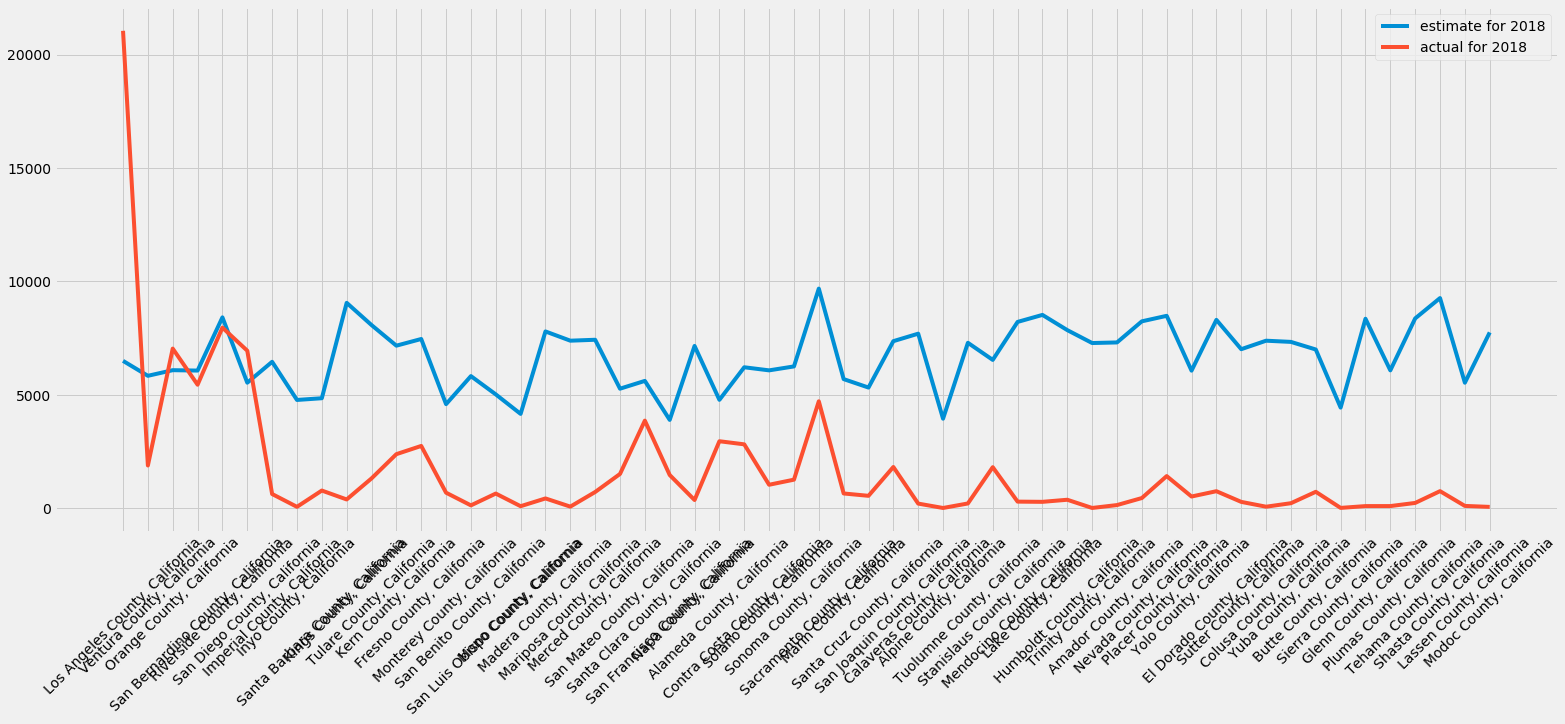

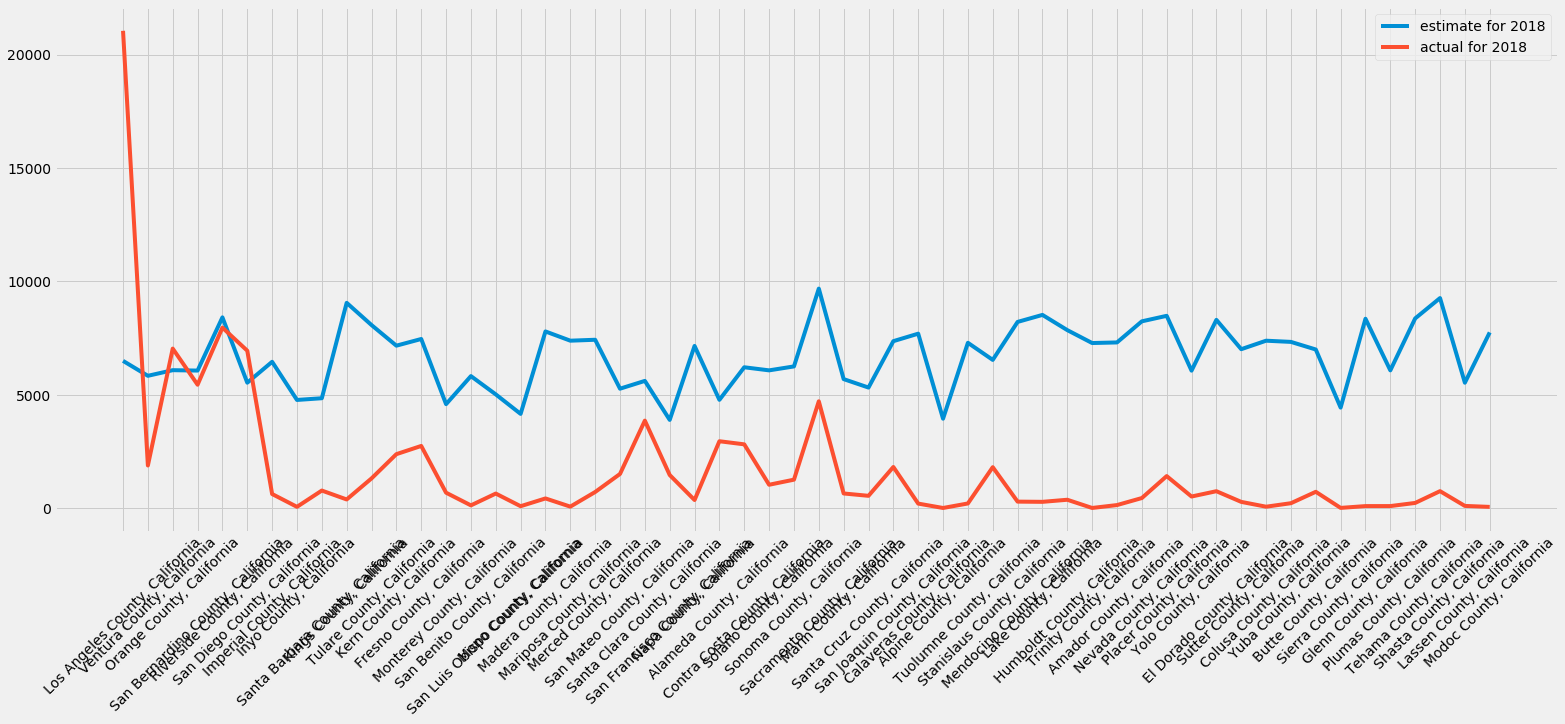

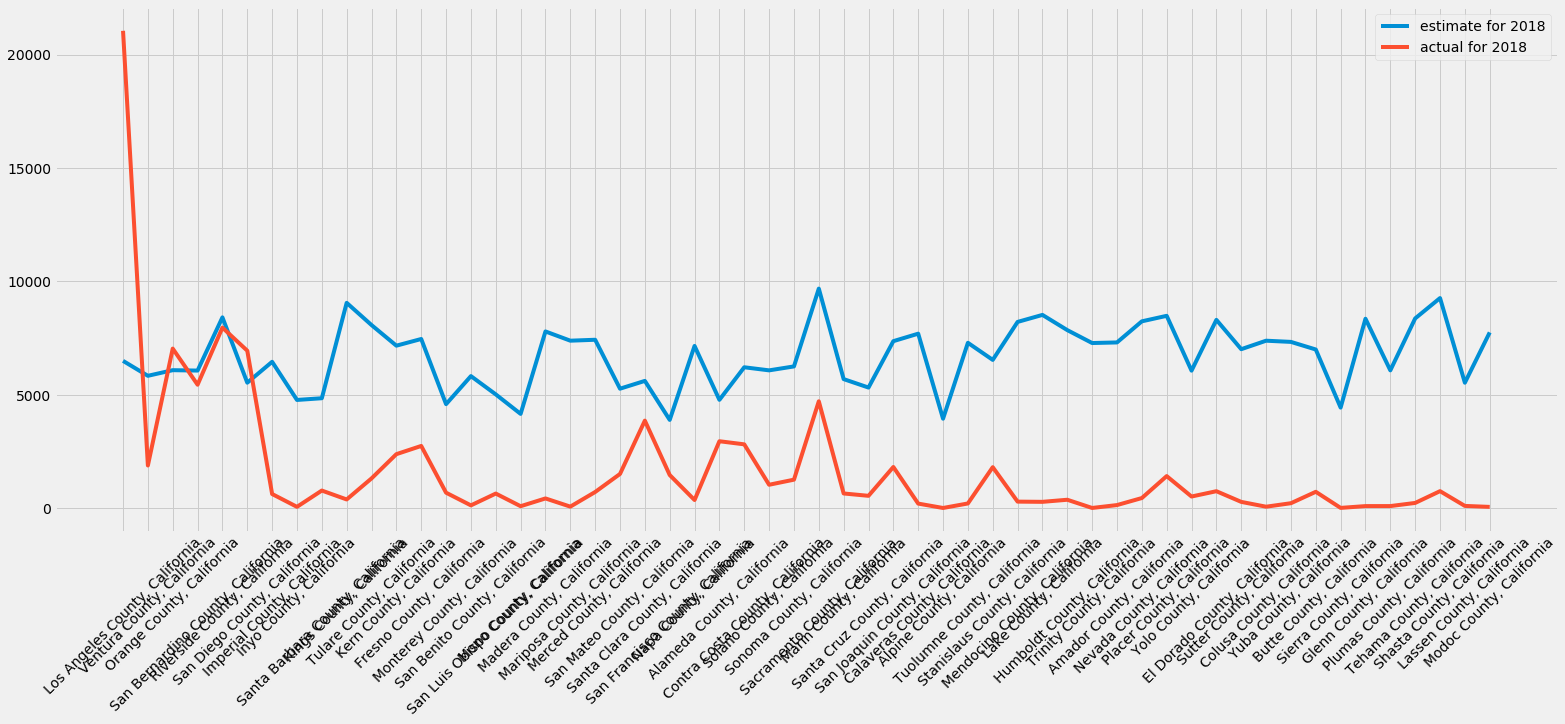

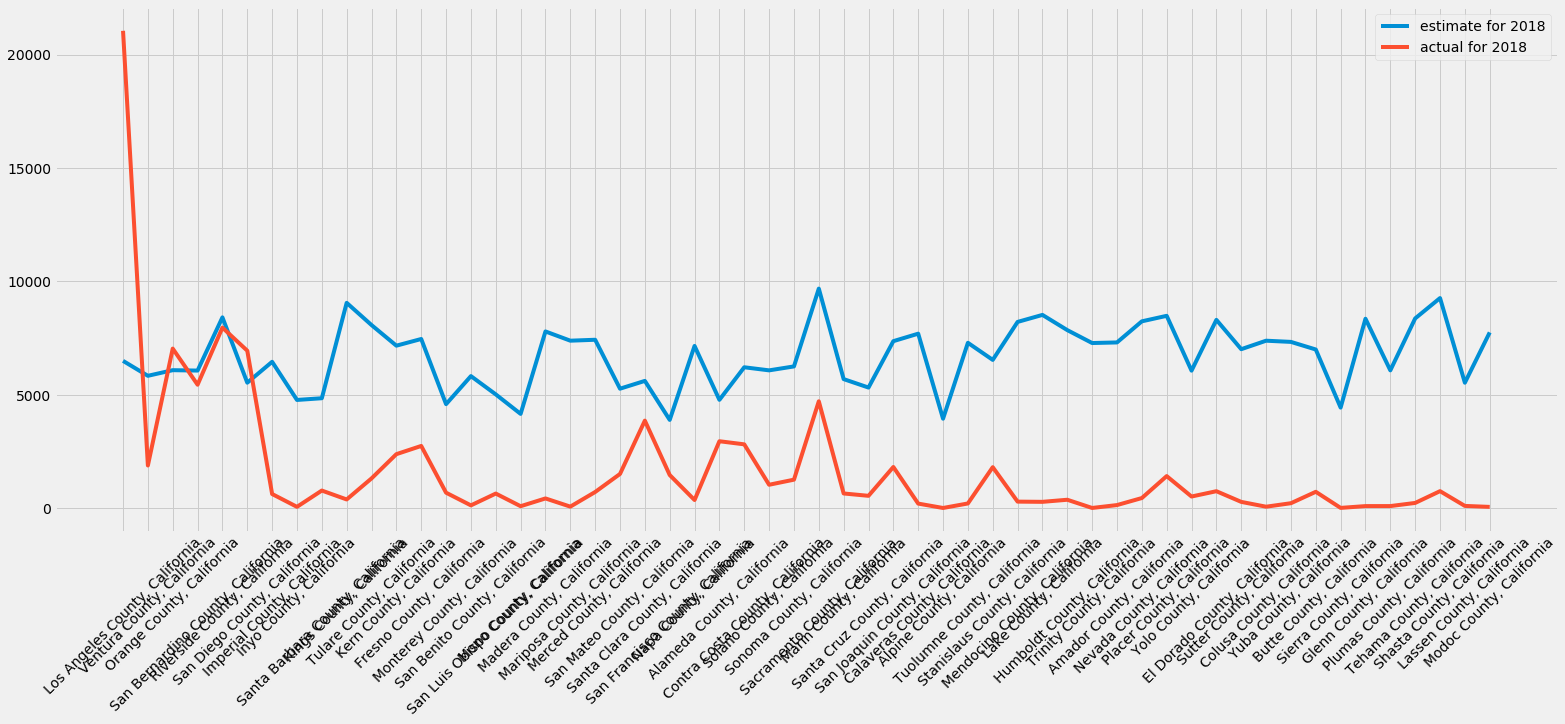

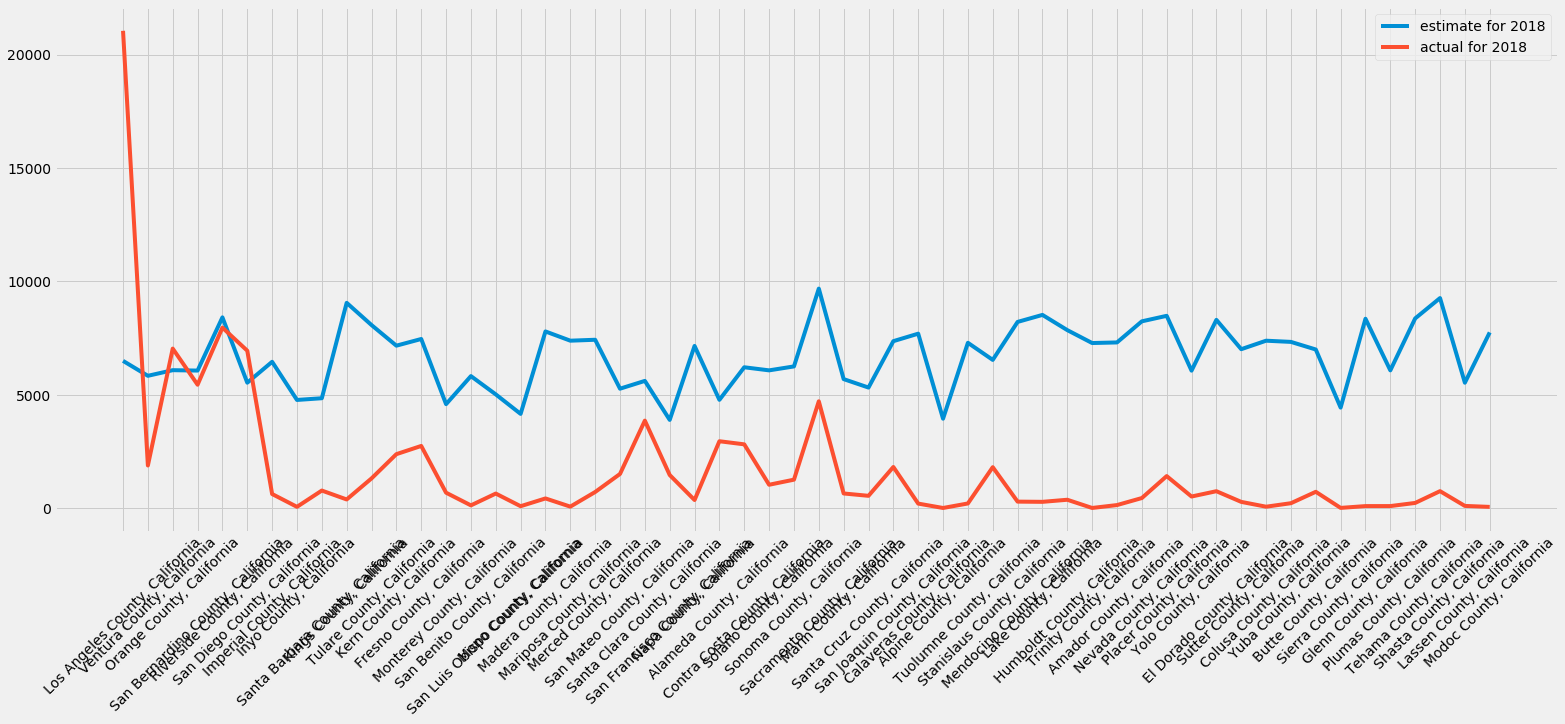

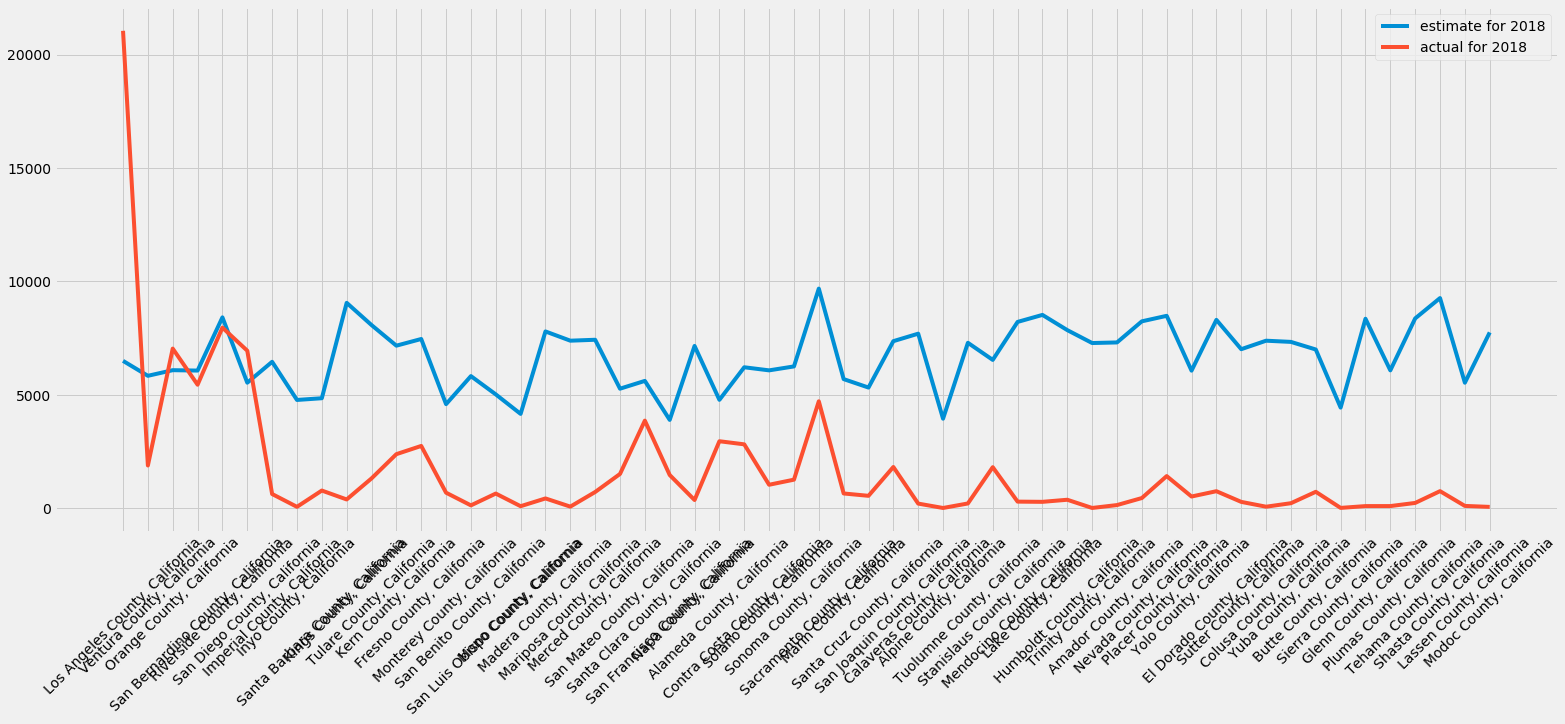

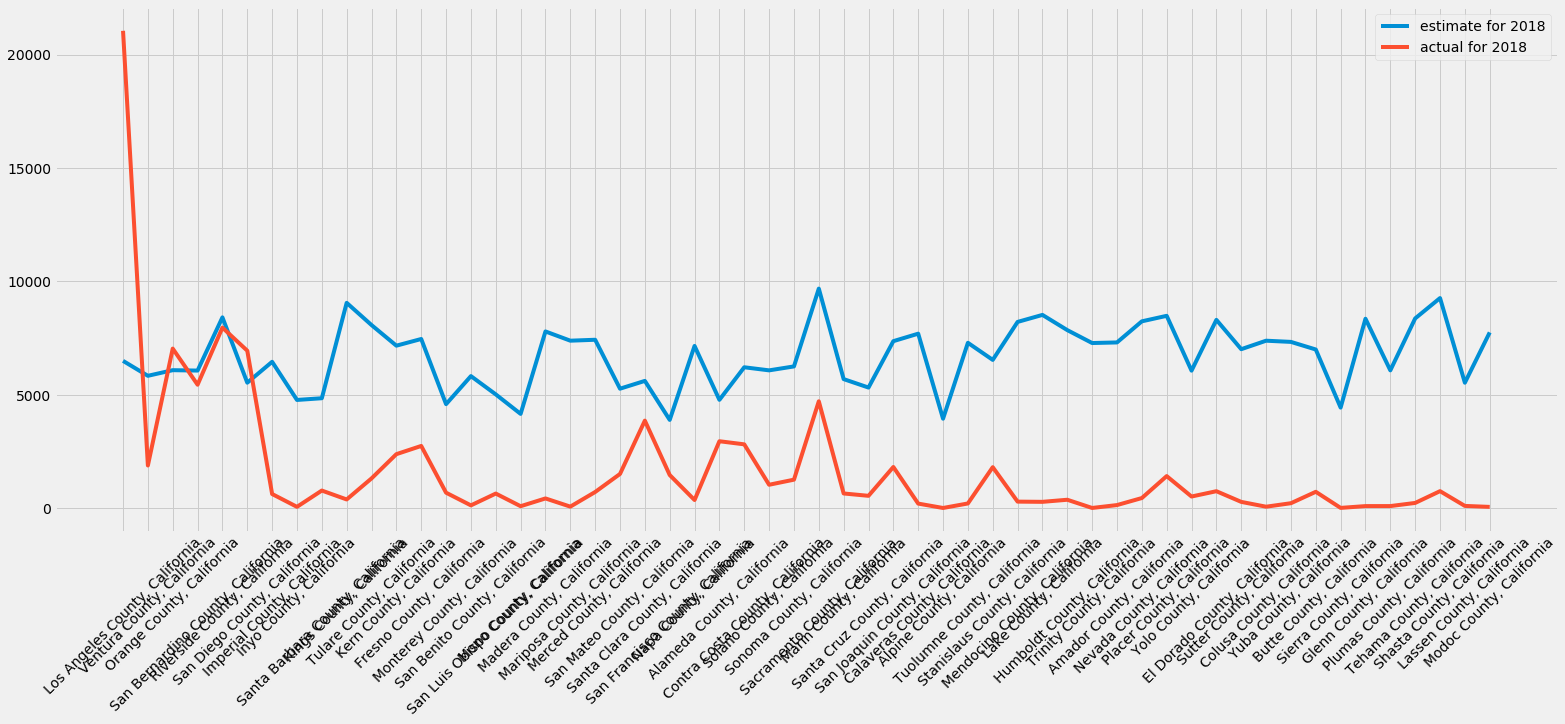

In [108]:
for year in year_range: 
    plt.figure(figsize=(24,9))
    temp = merge[merge['Year']==year_range[0]]
    plt.plot(temp['Geo_NAME'], temp['total'])
    plt.plot(temp['Geo_NAME'], temp['GWH'])
    plt.legend(('estimate for '+str(year_range[0]), 'actual for '+str(year_range[0])))
    plt.xticks(rotation=45)
    plt.show()

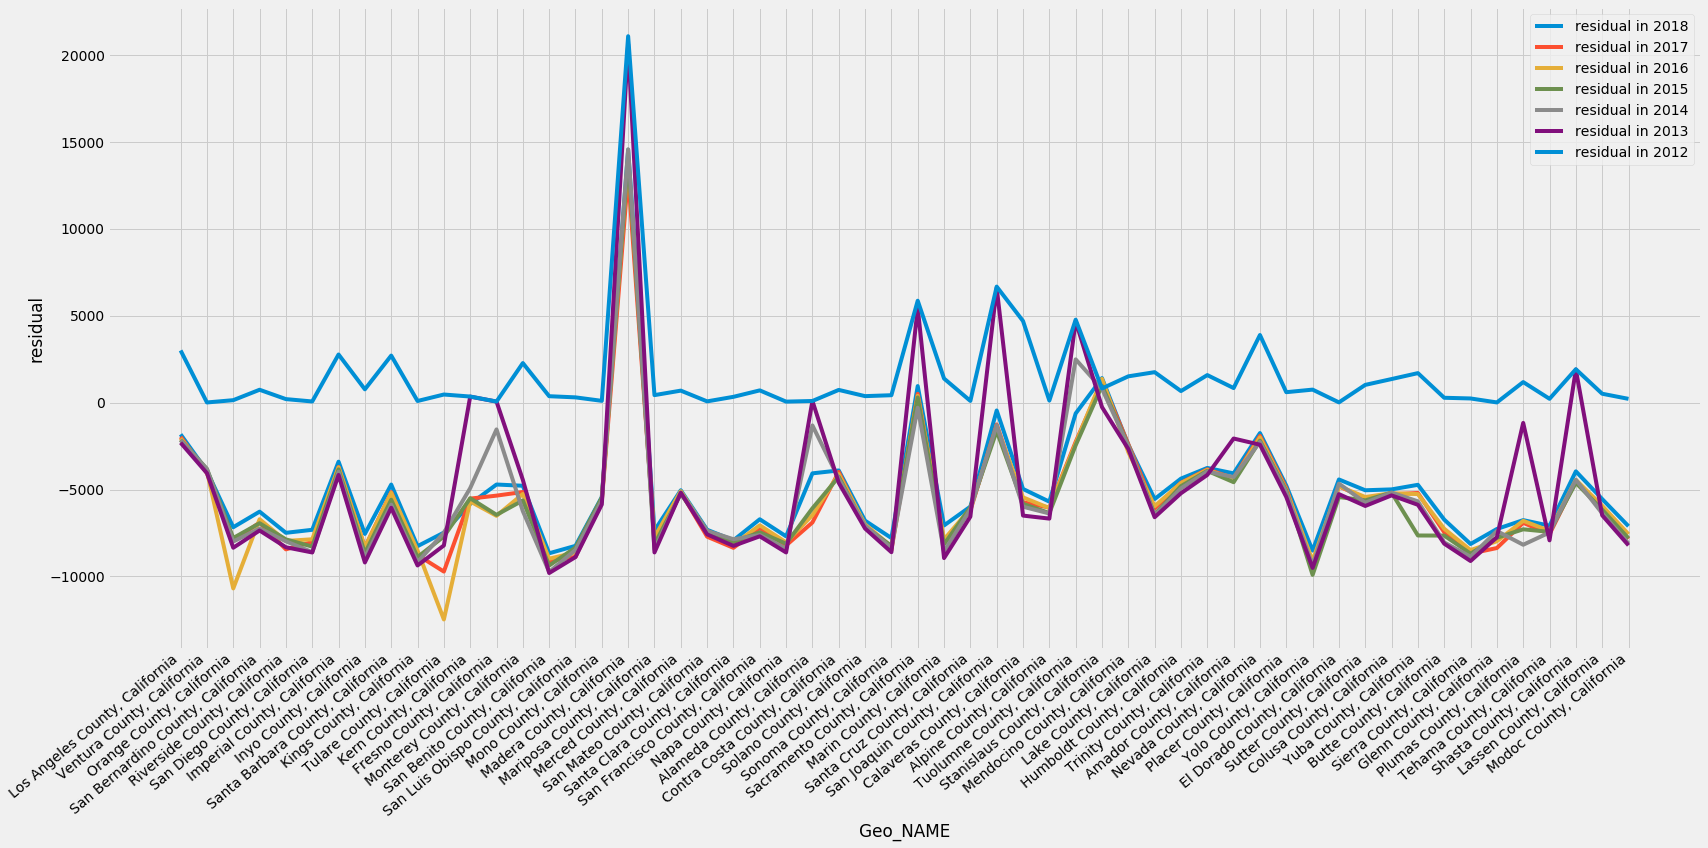

In [93]:
merge['residual'] = merge['GWH'] - merge['total']

plt.figure(figsize=(24,12))

legend = []
for year in year_range:
    temp = merge[merge['Year']==year]
    chart = sns.lineplot(temp['Geo_NAME'], temp['residual'], markers=True, dashes=False)
    legend.append('residual in ' + str(year))

plt.legend(legend)
chart.set_xticklabels(temp['Geo_NAME'] , rotation=40, ha="right")
plt.tight_layout()
plt.show()